In [1]:
from urllib import request

filenames = ["train-images-idx3-ubyte.gz",
             "train-labels-idx1-ubyte.gz",
             "t10k-images-idx3-ubyte.gz",
             "t10k-labels-idx1-ubyte.gz"]

folder = 'data_fashion_mnist/'
base_url = "http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/"
for name in filenames:
    print("Downloading " + name + "...")

    # lưu vào folder data_fashion_mnist
    request.urlretrieve(base_url + name, folder + name)

In [2]:
import numpy as np
import gzip

# load training images
with gzip.open('data_fashion_mnist/train-images-idx3-ubyte.gz', 'rb') as f:
    X_train = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28*28)

# load testing images
with gzip.open('data_fashion_mnist/t10k-images-idx3-ubyte.gz', 'rb') as f:
    X_test = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28*28)

# load training labels
with gzip.open('data_fashion_mnist/train-labels-idx1-ubyte.gz', 'rb') as f:
    y_train = np.frombuffer(f.read(), np.uint8, offset=8)
    
# load testing labels
with gzip.open('data_fashion_mnist/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    y_test = np.frombuffer(f.read(), np.uint8, offset=8)
    

# check data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


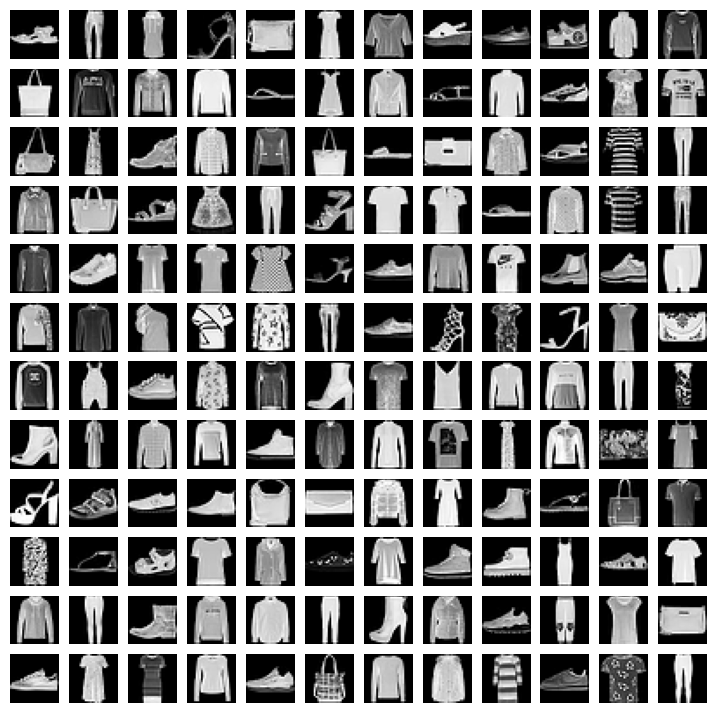

In [3]:
import matplotlib.pyplot as plt 
import numpy as np 

# Tạo danh sách 100 phần tử ngẫu nhiên từ X_train có 60000 phần tử
indices = list(np.random.randint(X_train.shape[0],size=144))

fig =plt.figure(figsize=(9,9))
columns = 12
rows = 12
for i in range(1, columns*rows +1):
    img = X_train[indices[i-1]].reshape(28,28)
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)

In [4]:
from PIL import Image

indices = list(np.random.randint(6000,size=10))
for i in range(10):
    im = Image.fromarray(X_train[indices[i]].reshape(28,28))
    im.save("data_fashion_mnist/images/image_" + str(i) +".png")    